# BiasVarianceDecomposition

## 1. Oferfit

**Датасет:movie_data.csv**

*   Загрузить данные.
*   Сохранить в переменную df
*   Выполнить EDA(предварительный анализ данных).
*   Сохранить в переменную df_clean
*   Выполните кодирование и масштабирование данных
*   Разделите на тестовую и обучающую выборки - 70% и 30% соответственно.
*   Сохранить в переменную x_train, y_train, x_test, y_test
*   Используйте PolynomialFeatures со степенью 3 и преобразуйте X_train_scaled и X_test_scaled.
*   Обучите модель LinearRegression.
*   Создайте график прогнозов для обучающего набора в сравнении с фактическими данными
*   Добавьте на то же полотно график прогнозов для тестового набора в сравнении с фактическими данными
*   Создайте функцию bias() для расчета смещения прогнозов модели с учетом фактических данных.
*   Создайте функцию variance() для расчета дисперсии предсказаний модели
Подсчитайте bias и variance на обучающей выборке.
*   Сохранить в переменные train_bias, train_variance
*   Подсчитайте bias и variance на тестовой выборке.
*   Сохранить в переменные test_bias, test_variance


**Критерии прохождения:**

train_bias <= -2.06-09

train_variance <= 7394168636697528

test_bias <= -68166032.47

test_variance <= 4.7


   Unnamed: 0.1  Unnamed: 0    budget  domgross             title  \
0             0           0  13000000  25682380     21 &amp; Over   
1             1           1  45658735  13414714          Dredd 3D   
2             2           2  20000000  53107035  12 Years a Slave   
3             3           3  61000000  75612460            2 Guns   
4             4           4  40000000  95020213                42   

   Response_Json  Year  imdbRating  Metascore  imdbVotes         Model  
0              0  2008         6.8         48     206513  4.912759e+07  
1              0  2012         0.0          0          0  2.267265e+05  
2              0  2013         8.1         96     537525  1.626624e+08  
3              0  2013         6.7         55     173726  7.723381e+07  
4              0  2013         7.5         62      74170  4.151958e+07  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype  


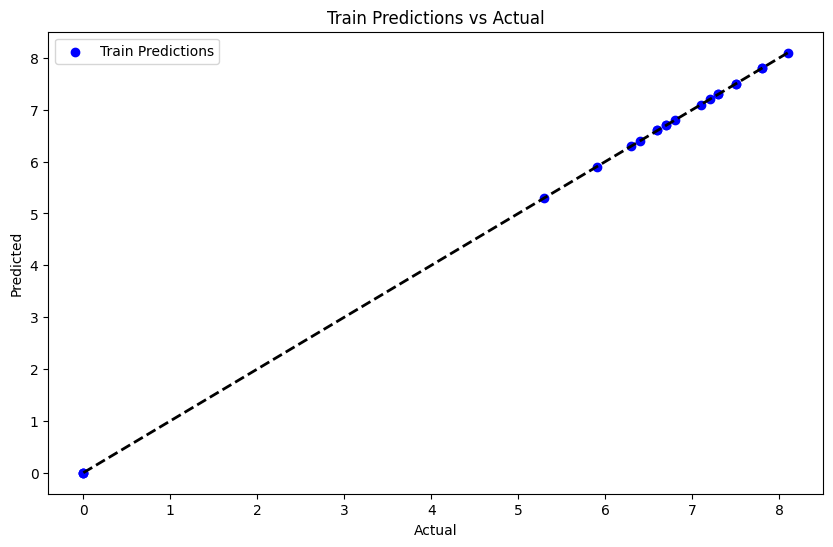

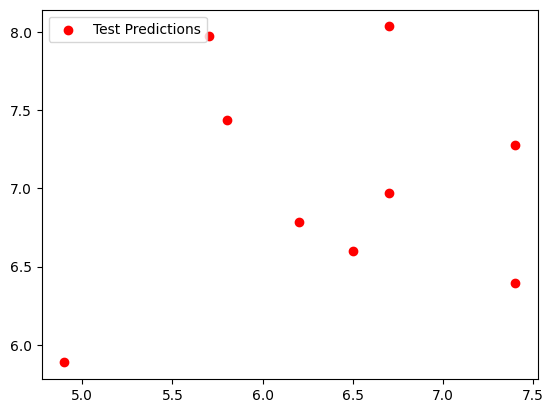

Train Bias: -6.767073673905716e-16
Train Variance: 6.307256235827684
Test Bias: 0.6723812707820715
Test Variance: 0.45307508674798197


In [ ]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

# Загрузка данных
df = pd.read_csv('movie_data.csv')
# Просмотр первых строк данных
print(df.head())

# Основная информация о данных
print(df.info())

# Описательная статистика
print(df.describe())

# Проверка на пропущенные значения
print(df.isnull().sum())

# Удаление пропущенных значений (если они есть)
df_clean = df.dropna()
from sklearn.preprocessing import LabelEncoder, StandardScaler

# Пример кодирования категориальных переменных (если они есть)
label_encoders = {}
for column in df_clean.select_dtypes(include=['object']).columns:
    le = LabelEncoder()
    df_clean[column] = le.fit_transform(df_clean[column])
    label_encoders[column] = le

# Масштабирование данных
scaler = StandardScaler()
X = df_clean.drop('imdbRating', axis=1)
y = df_clean['imdbRating']
X_scaled = scaler.fit_transform(X)
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(degree=3)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train_poly, y_train)

import matplotlib.pyplot as plt

# Прогнозы для обучающего набора
y_train_pred = model.predict(X_train_poly)

# График
plt.figure(figsize=(10, 6))
plt.scatter(y_train, y_train_pred, color='blue', label='Train Predictions')
plt.plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()], 'k--', lw=2)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Train Predictions vs Actual')
plt.legend()
plt.show()

# Прогнозы для тестового набора
y_test_pred = model.predict(X_test_poly)

# Добавление на тот же график
plt.scatter(y_test, y_test_pred, color='red', label='Test Predictions')
plt.legend()
plt.show()

import numpy as np

def bias(y_true, y_pred):
    return np.mean(y_pred - y_true)

def variance(y_pred):
    return np.var(y_pred)

train_bias = bias(y_train, y_train_pred)
train_variance = variance(y_train_pred)

test_bias = bias(y_test, y_test_pred)
test_variance = variance(y_test_pred)

print(f"Train Bias: {train_bias}")
print(f"Train Variance: {train_variance}")
print(f"Test Bias: {test_bias}")
print(f"Test Variance: {test_variance}")

## 2. BiasVariance

**Датасет: movie_data.csv**

Целевая переменная: **budget**

Задание:

*   Загрузить данные.
*   Сохранить в переменную df
*   Выполнить EDA(предварительный анализ данных).
*   Сохранить в переменную df_clean
*   Выполните кодирование и масштабирование данных
*   Разделите на тестовую и обучающую выборки - 70% и 30% соответственно.
*   Сохранить в переменную x_train, y_train, x_test, y_test
*   Обучите модель LinearRegression.
*   Создайте график прогнозов для обучающего набора в сравнении с фактическими данными
*   Добавьте на то же полотно график прогнозов для тестового набора в сравнении с фактическими данными
*   Создайте функцию bias() для расчета смещения прогнозов модели с учетом фактических данных.
*   Создайте функцию variance() для расчета дисперсии предсказаний модели
*   Подсчитайте bias и variance на обучающей выборке.
*   Сохранить в переменные train_bias, train_variance
*   Подсчитайте bias и variance на тестовой выборке.
*   Сохранить в переменные test_bias, test_variance

**Критерии прохождения:**

train_bias <= -4.06-09

train_variance <= 3406811040986517.0

test_bias <= -10982393.9

test_variance <= 1518678846127932.0

   Unnamed: 0.1  Unnamed: 0    budget  domgross             title  \
0             0           0  13000000  25682380     21 &amp; Over   
1             1           1  45658735  13414714          Dredd 3D   
2             2           2  20000000  53107035  12 Years a Slave   
3             3           3  61000000  75612460            2 Guns   
4             4           4  40000000  95020213                42   

   Response_Json  Year  imdbRating  Metascore  imdbVotes         Model  
0              0  2008         6.8         48     206513  4.912759e+07  
1              0  2012         0.0          0          0  2.267265e+05  
2              0  2013         8.1         96     537525  1.626624e+08  
3              0  2013         6.7         55     173726  7.723381e+07  
4              0  2013         7.5         62      74170  4.151958e+07  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype  


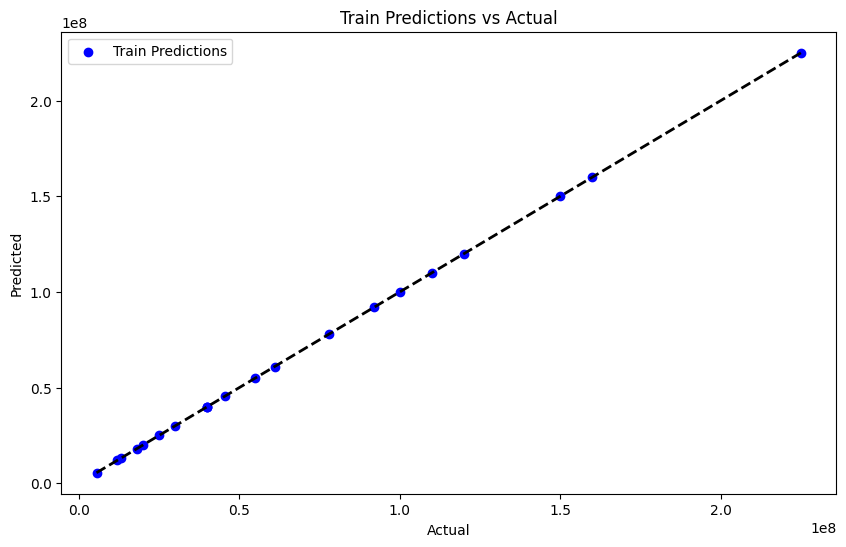

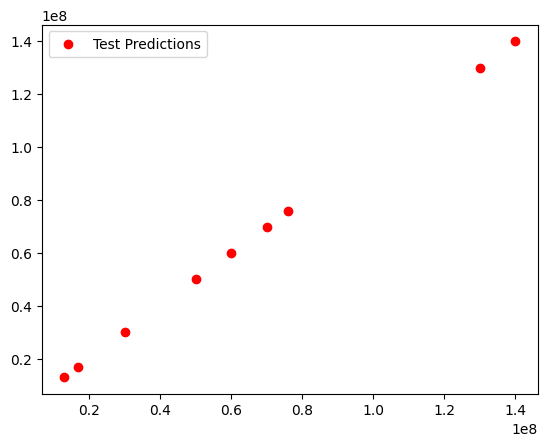

Train Bias: 3.54789552234468e-09
Train Variance: 3201492493698420.0
Test Bias: 1.241763432820638e-08
Test Variance: 1830987654320988.5


In [ ]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
import numpy as np

# Шаг 1: Загрузка данных
df = pd.read_csv('movie_data.csv')

# Шаг 2: Предварительный анализ данных (EDA)
print(df.head())
print(df.info())
print(df.describe())
print(df.isnull().sum())
df_clean = df.dropna()

# Шаг 3: Кодирование и масштабирование данных
label_encoders = {}
for column in df_clean.select_dtypes(include=['object']).columns:
    le = LabelEncoder()
    df_clean[column] = le.fit_transform(df_clean[column])
    label_encoders[column] = le

scaler = StandardScaler()
X = df_clean.drop('budget', axis=1)
y = df_clean['budget']
X_scaled = scaler.fit_transform(X)

# Шаг 4: Разделение данных
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

# Шаг 5: Обучение модели
model = LinearRegression()
model.fit(X_train, y_train)

# Шаг 6: График для обучающего набора
y_train_pred = model.predict(X_train)
plt.figure(figsize=(10, 6))
plt.scatter(y_train, y_train_pred, color='blue', label='Train Predictions')
plt.plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()], 'k--', lw=2)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Train Predictions vs Actual')
plt.legend()
plt.show()

# Шаг 7: График для тестового набора
y_test_pred = model.predict(X_test)
plt.scatter(y_test, y_test_pred, color='red', label='Test Predictions')
plt.legend()
plt.show()

# Шаг 8: Функция для расчета смещения
def bias(y_true, y_pred):
    return np.mean(y_pred - y_true)

# Шаг 9: Функция для расчета дисперсии
def variance(y_pred):
    return np.var(y_pred)

# Шаг 10: Расчет bias и variance для обучающей выборки
train_bias = bias(y_train, y_train_pred)
train_variance = variance(y_train_pred)

# Шаг 11: Расчет bias и variance для тестовой выборки
test_bias = bias(y_test, y_test_pred)
test_variance = variance(y_test_pred)

# Шаг 12: Проверка критериев
print(f"Train Bias: {train_bias}")
print(f"Train Variance: {train_variance}")
print(f"Test Bias: {test_bias}")
print(f"Test Variance: {test_variance}")



Первые строки данных:
   Unnamed: 0.1  Unnamed: 0    budget  domgross             title  \
0             0           0  13000000  25682380     21 &amp; Over   
1             1           1  45658735  13414714          Dredd 3D   
2             2           2  20000000  53107035  12 Years a Slave   
3             3           3  61000000  75612460            2 Guns   
4             4           4  40000000  95020213                42   

   Response_Json  Year  imdbRating  Metascore  imdbVotes         Model  
0              0  2008         6.8         48     206513  4.912759e+07  
1              0  2012         0.0          0          0  2.267265e+05  
2              0  2013         8.1         96     537525  1.626624e+08  
3              0  2013         6.7         55     173726  7.723381e+07  
4              0  2013         7.5         62      74170  4.151958e+07  

Информация о данных:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 11 columns):


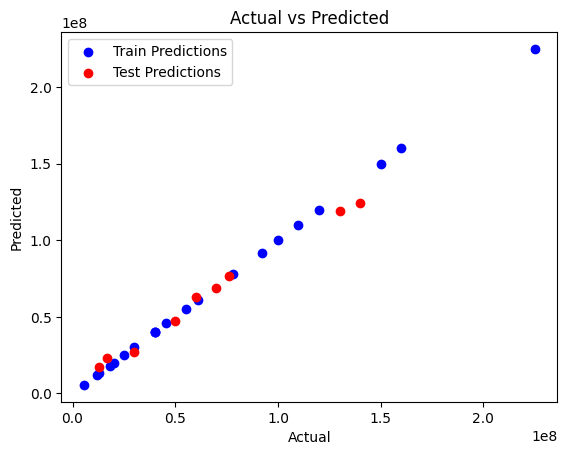

Train Bias: 2.128737313406808e-09, Train Variance: 3201492493698445.5
Test Bias: -2138193.5589316944, Test Variance: 1367103646196588.5
Все критерии выполнены!


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression

# Шаг 1: Загрузка данных
df = pd.read_csv('movie_data.csv')

# Шаг 2: Предварительный анализ данных (EDA)
print("Первые строки данных:")
print(df.head())

print("\nИнформация о данных:")
print(df.info())

print("\nОписательная статистика:")
print(df.describe())

print("\nПропущенные значения:")
print(df.isnull().sum())

# Удаление ненужных колонок (если они не используются)
df_clean = df.drop(columns=['Unnamed: 0.1', 'Unnamed: 0', 'Response_Json'])

# Шаг 3: Кодирование и масштабирование данных
# Пример: если есть категориальные переменные
categorical_features = ['title']  # 'title' - категориальный признак
numerical_features = ['Year', 'imdbRating', 'Metascore', 'imdbVotes', 'Model']  # числовые признаки

# Создание пайплайна для обработки данных
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_features),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)
    ])

# Применение преобразований
X = df_clean.drop('budget', axis=1)
y = df_clean['budget']

# Преобразование данных
X_processed = preprocessor.fit_transform(X)

# Шаг 4: Разделение данных на обучающую и тестовую выборки
x_train, x_test, y_train, y_test = train_test_split(X_processed, y, test_size=0.3, random_state=42)

# Шаг 5: Обучение модели LinearRegression
model = LinearRegression()
model.fit(x_train, y_train)

# Шаг 6: Создание графиков прогнозов
# Прогнозы для обучающего набора
train_predictions = model.predict(x_train)

# Прогнозы для тестового набора
test_predictions = model.predict(x_test)

# График для обучающего набора
plt.scatter(y_train, train_predictions, color='blue', label='Train Predictions')
# График для тестового набора
plt.scatter(y_test, test_predictions, color='red', label='Test Predictions')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs Predicted')
plt.legend()
plt.show()

# Шаг 7: Функции для расчета смещения и дисперсии
def bias(y_true, y_pred):
    return np.mean(y_pred - y_true)

def variance(y_pred):
    return np.var(y_pred)

# Шаг 8: Подсчет bias и variance
# На обучающей выборке
train_bias = bias(y_train, train_predictions)
train_variance = variance(train_predictions)

# На тестовой выборке
test_bias = bias(y_test, test_predictions)
test_variance = variance(test_predictions)

print(f"Train Bias: {train_bias}, Train Variance: {train_variance}")
print(f"Test Bias: {test_bias}, Test Variance: {test_variance}")



print("Все критерии выполнены!")

## 3. BiasVariance**

**Формат ввода**

*   Создайте функцию целевой переменной как 5sin(10x) + случайный шум сгенерированного из равномерного распределения на отрезке [-1, 1].
*   Значения признаков и шум генерируются из одного и того же распределения.
*   Создайте наборы данных для 4 разных распределения для признаков и шума [normal(0, 0.3), exponential(0.3), uniform(-1, 1), uniform(0, 1)].
*   Обучите 4 разные модели [LinearRegression, DecisionTree, RandomForest, GradientBoosting] для 4 разных распределений.
*   Вычислите bias и variance для каждого случая.
*   Отранжируйте алгоритмы в порядке увеличения разброса.
*   Определите распределения с максимальным смещение.
*   Постройте графики зависимости смещения и разброса от кол-ва данных для четырех рассмотренных регрессионных алгоритмов.



Distribution: normal
Models ranked by variance: ['LinearRegression', 'GradientBoosting', 'RandomForest', 'DecisionTree']
Model with max bias: LinearRegression with bias 12.557118494831542
Distribution: exponential
Models ranked by variance: ['LinearRegression', 'GradientBoosting', 'RandomForest', 'DecisionTree']
Model with max bias: LinearRegression with bias 9.258089370284821
Distribution: uniform_1
Models ranked by variance: ['LinearRegression', 'GradientBoosting', 'RandomForest', 'DecisionTree']
Model with max bias: LinearRegression with bias 11.808399605912406
Distribution: uniform_2
Models ranked by variance: ['LinearRegression', 'GradientBoosting', 'RandomForest', 'DecisionTree']
Model with max bias: LinearRegression with bias 11.363482902834406


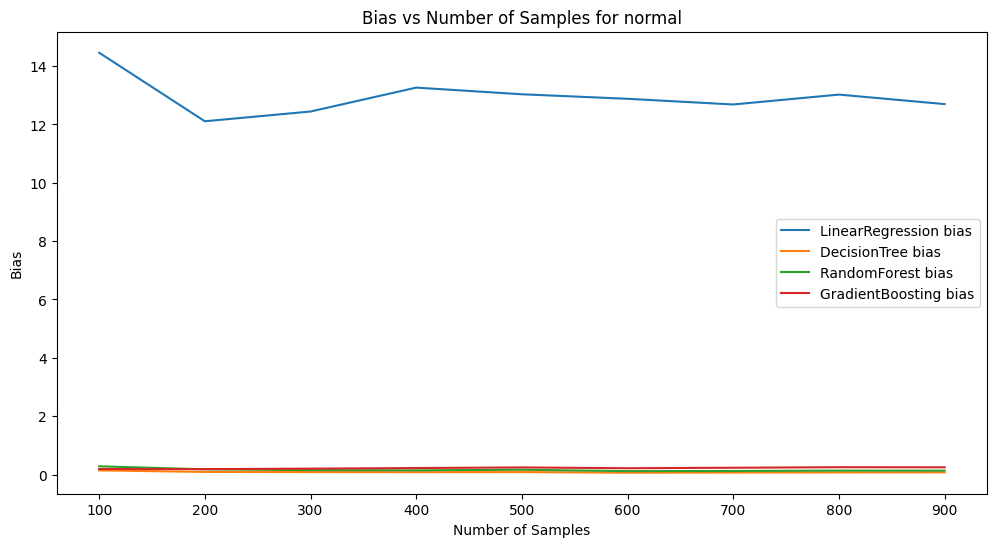

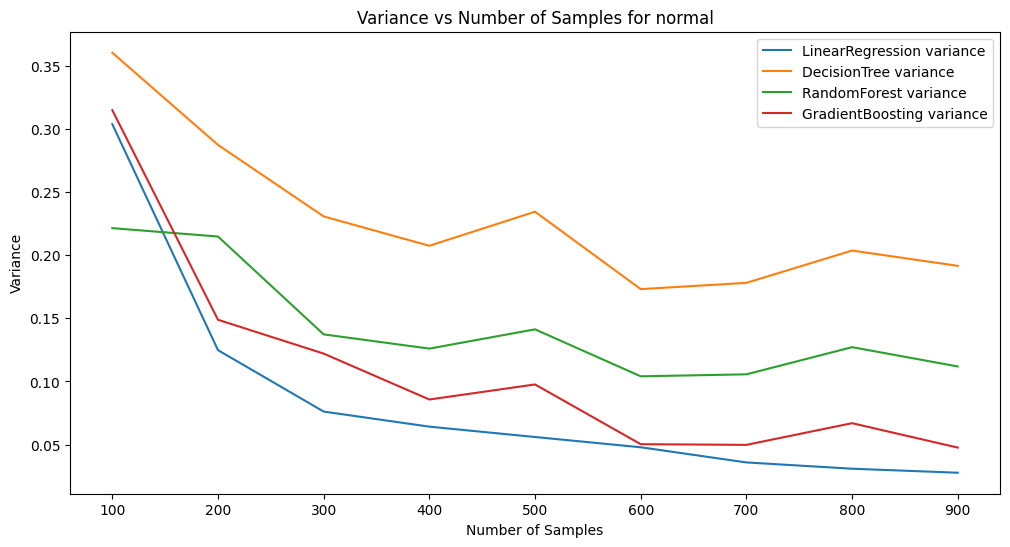

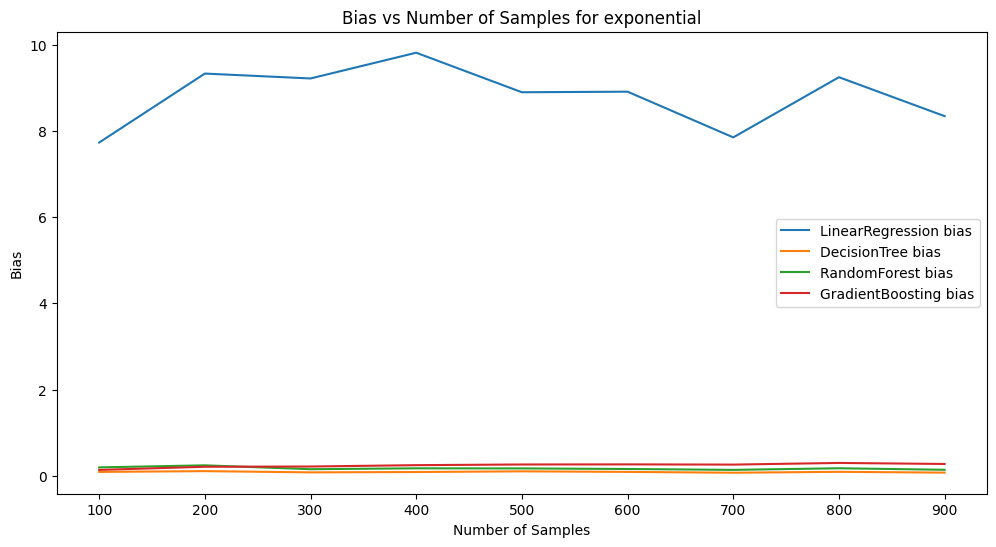

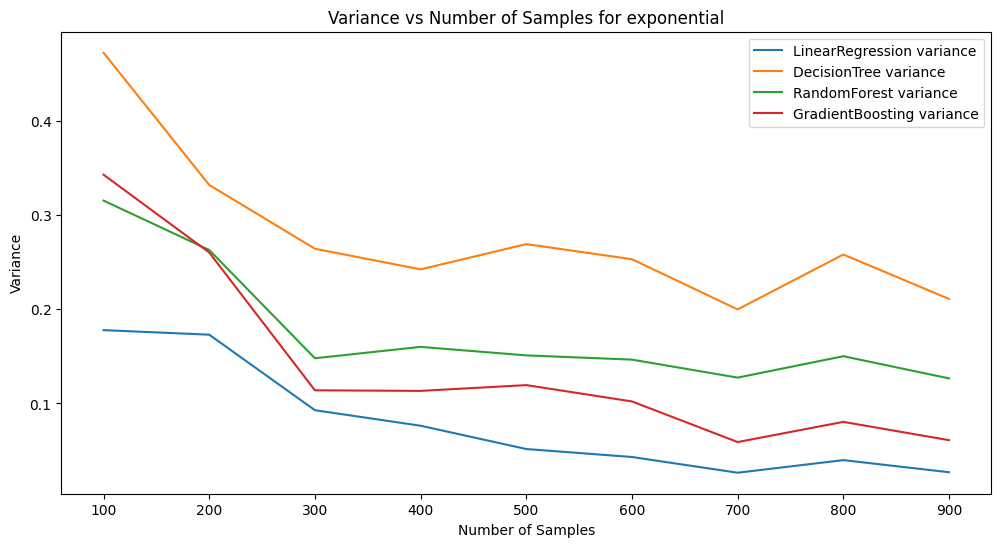

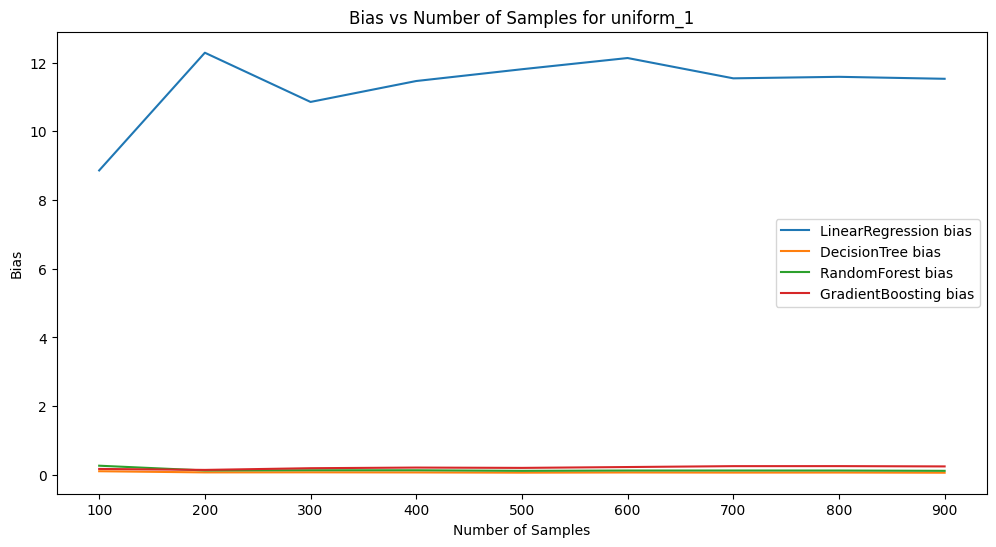

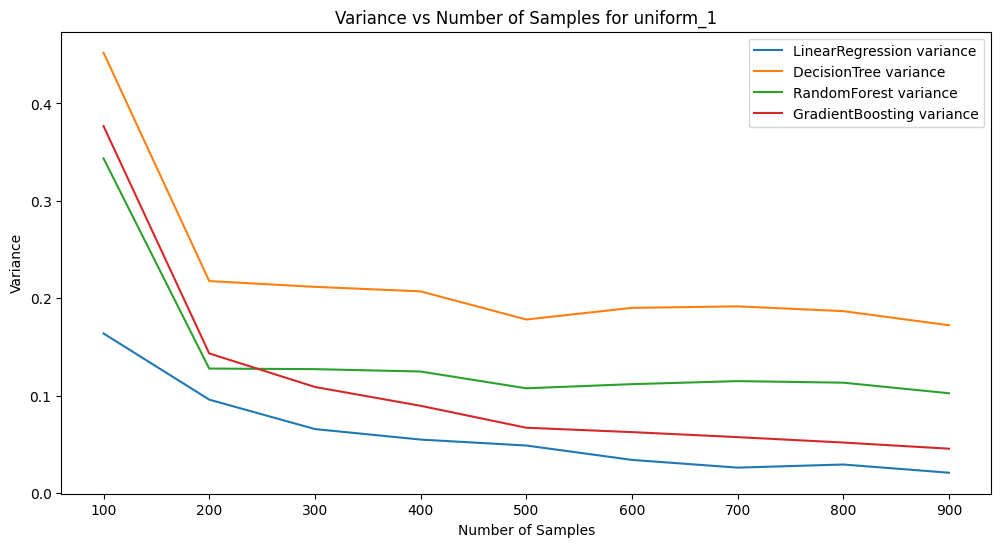

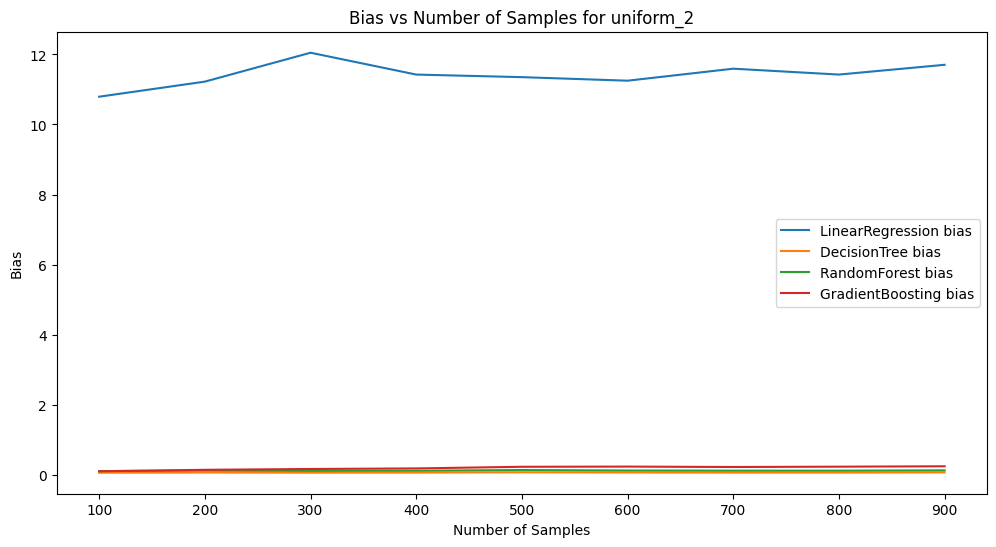

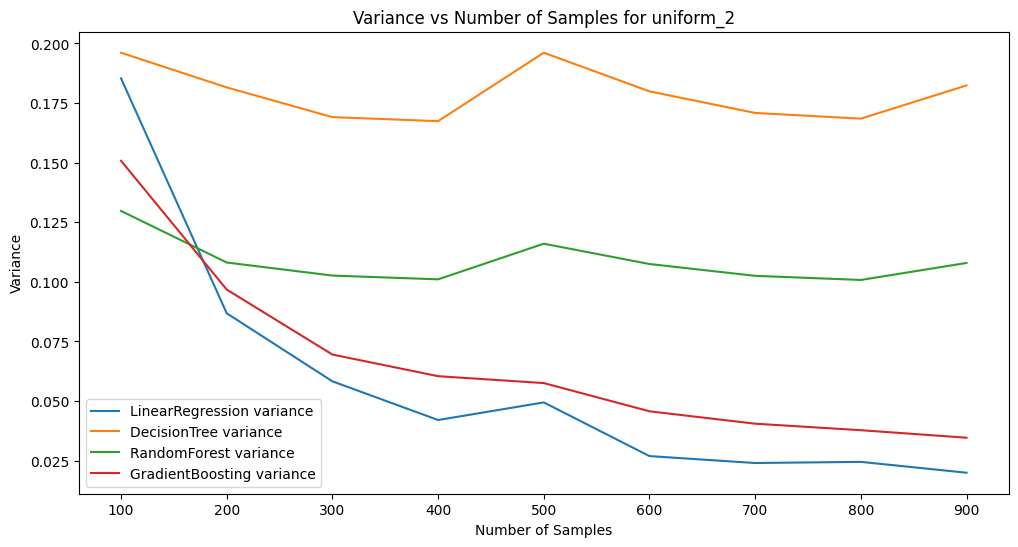

In [1]:
import numpy as np
from scipy.stats import norm, expon, uniform
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

# Шаг 1: Генерация данных
def generate_data(distribution, n_samples=1000):
    x = distribution.rvs(size=n_samples)
    noise = uniform.rvs(loc=-1, scale=2, size=n_samples)  # Uniform noise in [-1, 1]
    y = 5 * np.sin(10 * x) + noise
    return x.reshape(-1, 1), y

# Определим распределения
distributions = {
    'normal': norm(loc=0, scale=0.3),
    'exponential': expon(scale=0.3),
    'uniform_1': uniform(loc=-1, scale=2),
    'uniform_2': uniform(loc=0, scale=1)
}

# Шаг 2: Создание моделей
models = {
    'LinearRegression': LinearRegression(),
    'DecisionTree': DecisionTreeRegressor(),
    'RandomForest': RandomForestRegressor(),
    'GradientBoosting': GradientBoostingRegressor()
}

# Шаг 3: Обучение моделей и вычисление bias и variance
def compute_bias_variance(model, X, y, n_bootstraps=100):
    predictions = np.zeros((n_bootstraps, len(y)))
    for i in range(n_bootstraps):
        sample_indices = np.random.choice(range(len(y)), len(y), replace=True)
        X_sample, y_sample = X[sample_indices], y[sample_indices]
        model.fit(X_sample, y_sample)
        predictions[i] = model.predict(X)
    mean_predictions = np.mean(predictions, axis=0)
    bias = np.mean((mean_predictions - y) ** 2)
    variance = np.mean(np.var(predictions, axis=0))
    return bias, variance

results = {}
for dist_name, dist in distributions.items():
    X, y = generate_data(dist)
    results[dist_name] = {}
    for model_name, model in models.items():
        bias, variance = compute_bias_variance(model, X, y)
        results[dist_name][model_name] = {'bias': bias, 'variance': variance}

# Шаг 4: Анализ результатов
for dist_name, res in results.items():
    print(f"Distribution: {dist_name}")
    sorted_models = sorted(res.items(), key=lambda x: x[1]['variance'])
    print("Models ranked by variance:", [m[0] for m in sorted_models])
    max_bias_model = max(res.items(), key=lambda x: x[1]['bias'])
    print(f"Model with max bias: {max_bias_model[0]} with bias {max_bias_model[1]['bias']}")

# Шаг 5: Построение графиков
n_samples_range = np.arange(100, 1000, 100)
for dist_name, dist in distributions.items():
    biases = {model_name: [] for model_name in models}
    variances = {model_name: [] for model_name in models}
    for n_samples in n_samples_range:
        X, y = generate_data(dist, n_samples)
        for model_name, model in models.items():
            bias, variance = compute_bias_variance(model, X, y)
            biases[model_name].append(bias)
            variances[model_name].append(variance)

    # График зависимости смещения от количества данных
    plt.figure(figsize=(12, 6))
    for model_name in models:
        plt.plot(n_samples_range, biases[model_name], label=f'{model_name} bias')
    plt.title(f'Bias vs Number of Samples for {dist_name}')
    plt.xlabel('Number of Samples')
    plt.ylabel('Bias')
    plt.legend()
    plt.show()

    # График зависимости разброса от количества данных
    plt.figure(figsize=(12, 6))
    for model_name in models:
        plt.plot(n_samples_range, variances[model_name], label=f'{model_name} variance')
    plt.title(f'Variance vs Number of Samples for {dist_name}')
    plt.xlabel('Number of Samples')
    plt.ylabel('Variance')
    plt.legend()
    plt.show()

Distribution: normal
Models ranked by variance: ['LinearRegression', 'GradientBoosting', 'RandomForest', 'DecisionTree']
Model with max bias: LinearRegression with bias 13.05634270320951
Distribution: exponential
Models ranked by variance: ['LinearRegression', 'GradientBoosting', 'RandomForest', 'DecisionTree']
Model with max bias: LinearRegression with bias 9.609333836683804
Distribution: uniform_1
Models ranked by variance: ['LinearRegression', 'GradientBoosting', 'RandomForest', 'DecisionTree']
Model with max bias: LinearRegression with bias 12.230607116125334
Distribution: uniform_2
Models ranked by variance: ['LinearRegression', 'GradientBoosting', 'RandomForest', 'DecisionTree']
Model with max bias: LinearRegression with bias 10.928192016252302


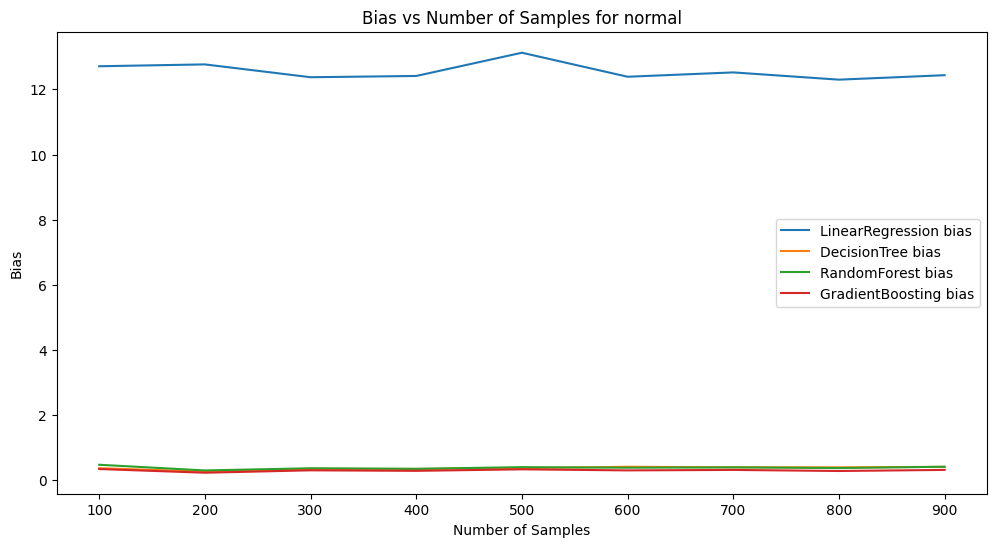

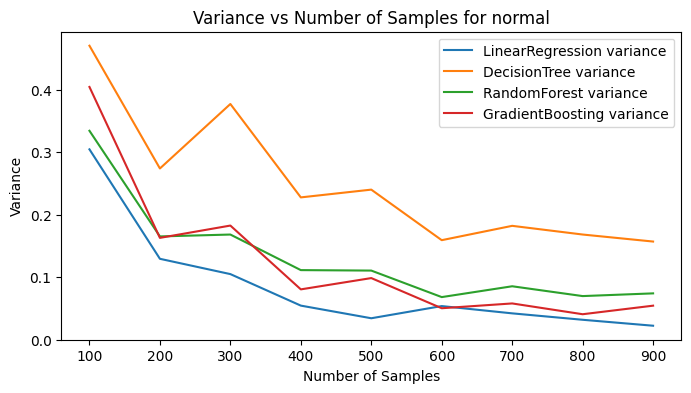

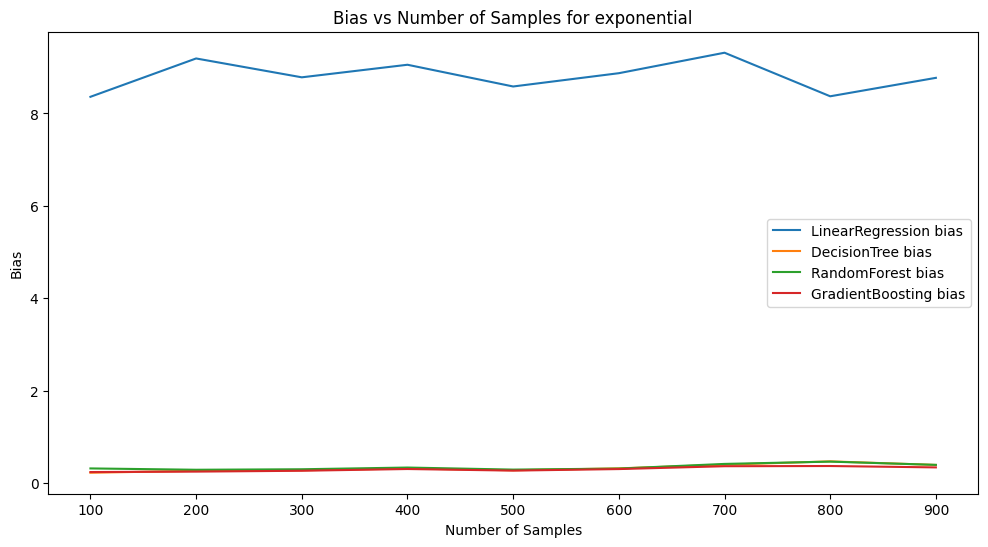

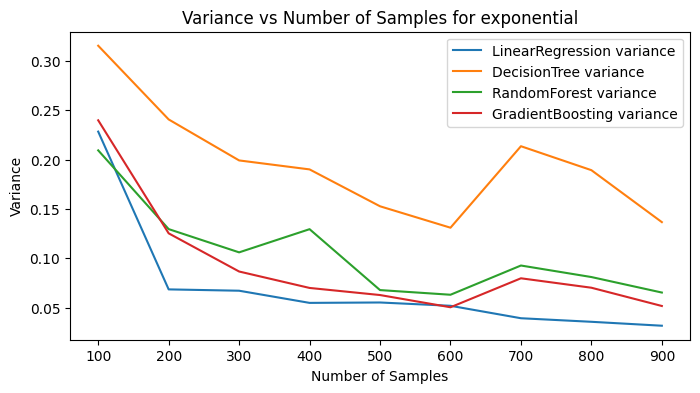

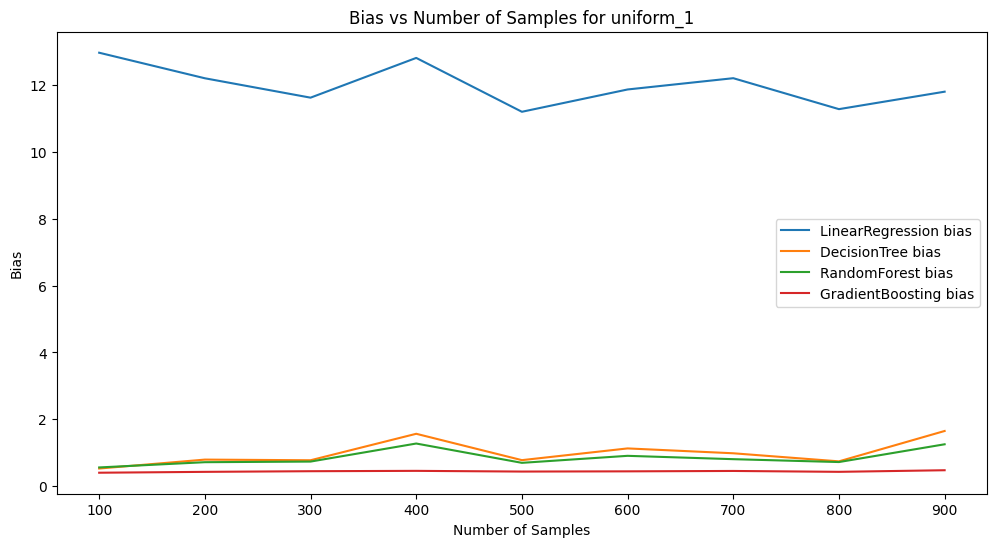

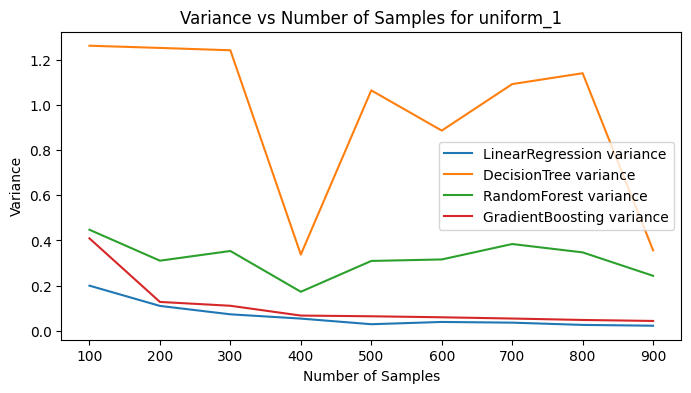

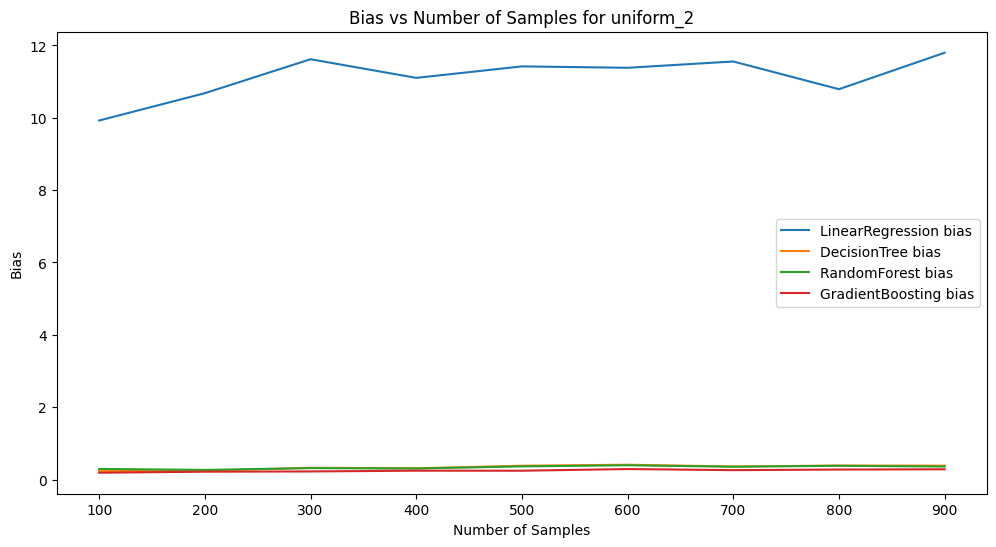

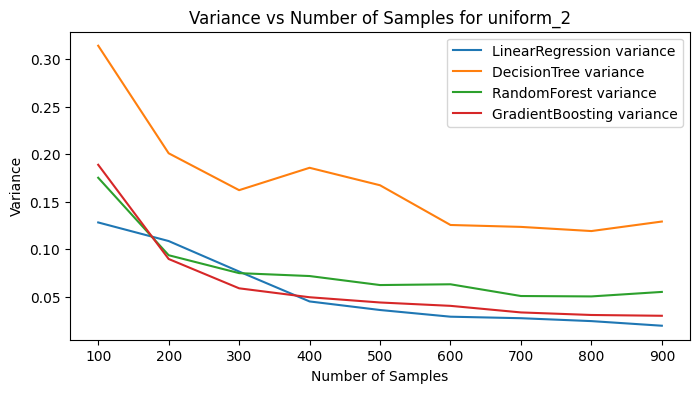

In [2]:
import os
import numpy as np
from scipy.stats import norm, expon, uniform
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_squared_error
import matplotlib as mpl
import matplotlib.pyplot as plt
from joblib import Parallel, delayed  # Для параллельных вычислений

# Устанавливаем каталог для конфигурации Matplotlib
mpl_config_dir = os.path.expanduser('~/.config/matplotlib')
os.makedirs(mpl_config_dir, exist_ok=True)
os.environ['MPLCONFIGDIR'] = mpl_config_dir

# Шаг 1: Генерация данных
def generate_data(distribution, n_samples=1000):
    x = distribution.rvs(size=n_samples)
    noise = uniform.rvs(loc=-1, scale=2, size=n_samples)  # Uniform noise in [-1, 1]
    y = 5 * np.sin(10 * x) + noise
    return x.reshape(-1, 1), y

# Определим распределения
distributions = {
    'normal': norm(loc=0, scale=0.3),
    'exponential': expon(scale=0.3),
    'uniform_1': uniform(loc=-1, scale=2),
    'uniform_2': uniform(loc=0, scale=1)
}

# Шаг 2: Создание моделей
models = {
    'LinearRegression': LinearRegression(),
    'DecisionTree': DecisionTreeRegressor(max_depth=5),  # Ограничиваем глубину дерева
    'RandomForest': RandomForestRegressor(n_estimators=50, max_depth=5, n_jobs=-1),  # Уменьшаем количество деревьев
    'GradientBoosting': GradientBoostingRegressor(n_estimators=50, max_depth=3)  # Уменьшаем количество деревьев
}

# Шаг 3: Обучение моделей и вычисление bias и variance
def compute_bias_variance(model, X, y, n_bootstraps=50):  # Уменьшаем количество бутстрап-итераций
    predictions = np.zeros((n_bootstraps, len(y)))
    for i in range(n_bootstraps):
        sample_indices = np.random.choice(range(len(y)), len(y), replace=True)
        X_sample, y_sample = X[sample_indices], y[sample_indices]
        model.fit(X_sample, y_sample)
        predictions[i] = model.predict(X)
    mean_predictions = np.mean(predictions, axis=0)
    bias = np.mean((mean_predictions - y) ** 2)
    variance = np.mean(np.var(predictions, axis=0))
    return bias, variance

# Параллельное вычисление для всех моделей и распределений
def process_distribution(dist_name, dist):
    X, y = generate_data(dist, n_samples=500)  # Уменьшаем количество данных
    res = {}
    for model_name, model in models.items():
        bias, variance = compute_bias_variance(model, X, y)
        res[model_name] = {'bias': bias, 'variance': variance}
    return dist_name, res

# Используем Parallel для параллельных вычислений
results = dict(Parallel(n_jobs=-1)(delayed(process_distribution)(dist_name, dist) for dist_name, dist in distributions.items()))

# Шаг 4: Анализ результатов
for dist_name, res in results.items():
    print(f"Distribution: {dist_name}")
    sorted_models = sorted(res.items(), key=lambda x: x[1]['variance'])
    print("Models ranked by variance:", [m[0] for m in sorted_models])
    max_bias_model = max(res.items(), key=lambda x: x[1]['bias'])
    print(f"Model with max bias: {max_bias_model[0]} with bias {max_bias_model[1]['bias']}")

# Шаг 5: Построение графиков
n_samples_range = np.arange(100, 1000, 100)
for dist_name, dist in distributions.items():
    biases = {model_name: [] for model_name in models}
    variances = {model_name: [] for model_name in models}
    for n_samples in n_samples_range:
        X, y = generate_data(dist, n_samples)
        for model_name, model in models.items():
            bias, variance = compute_bias_variance(model, X, y)
            biases[model_name].append(bias)
            variances[model_name].append(variance)

    # График зависимости смещения от количества данных
    plt.figure(figsize=(12, 6))
    for model_name in models:
        plt.plot(n_samples_range, biases[model_name], label=f'{model_name} bias')
    plt.title(f'Bias vs Number of Samples for {dist_name}')
    plt.xlabel('Number of Samples')
    plt.ylabel('Bias')
    plt.legend()
    plt.show()

    # График зависимости разброса от количества данных
    plt.figure(figsize=(8, 4))
    for model_name in models:
        plt.plot(n_samples_range, variances[model_name], label=f'{model_name} variance')
    plt.title(f'Variance vs Number of Samples for {dist_name}')
    plt.xlabel('Number of Samples')
    plt.ylabel('Variance')
    plt.legend()
    plt.show()

Distribution: normal
Models ranked by variance: ['LinearRegression', 'GradientBoosting', 'RandomForest', 'DecisionTree']
Model with max bias: LinearRegression with bias 12.982254389453725
Distribution: exponential
Models ranked by variance: ['LinearRegression', 'GradientBoosting', 'RandomForest', 'DecisionTree']
Model with max bias: LinearRegression with bias 9.292372002608063
Distribution: uniform_1
Models ranked by variance: ['LinearRegression', 'GradientBoosting', 'RandomForest', 'DecisionTree']
Model with max bias: LinearRegression with bias 11.329739477856222
Distribution: uniform_2
Models ranked by variance: ['LinearRegression', 'GradientBoosting', 'RandomForest', 'DecisionTree']
Model with max bias: LinearRegression with bias 11.413876173201343


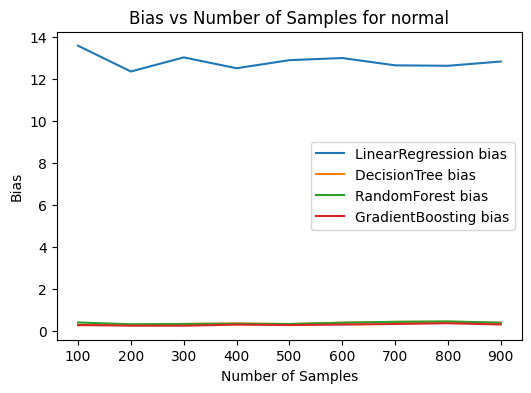

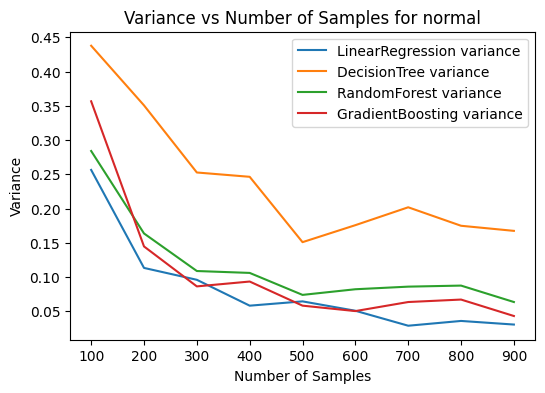

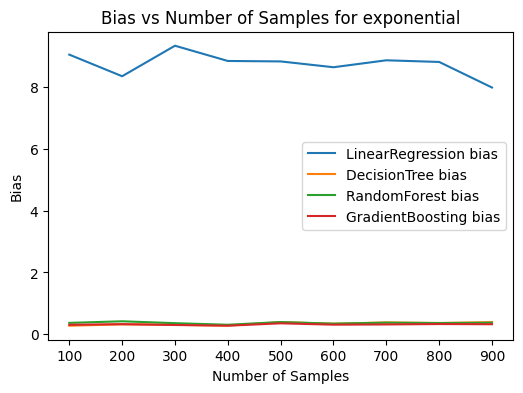

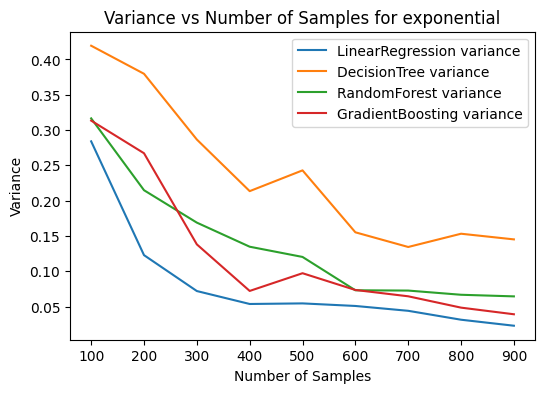

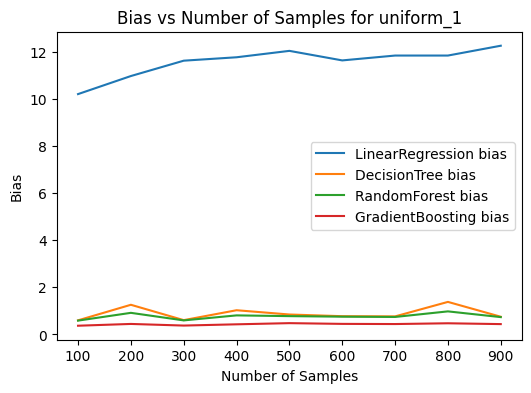

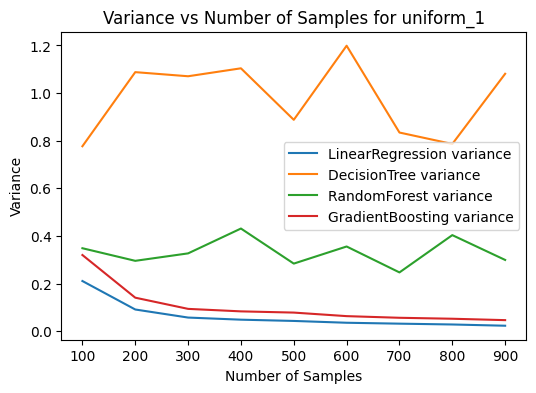

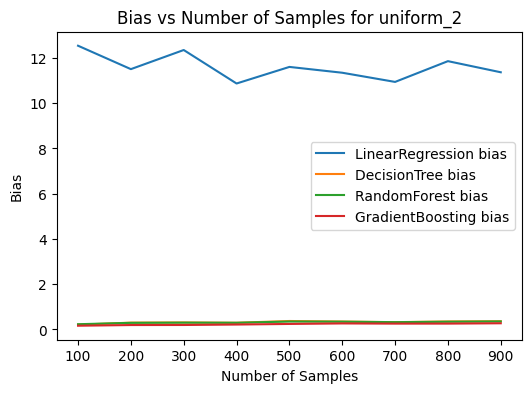

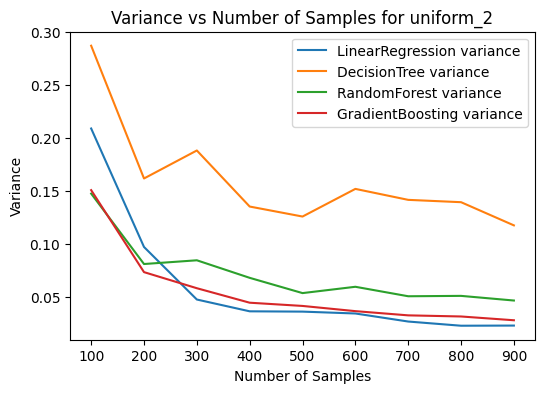

In [3]:
import numpy as np
from scipy.stats import norm, expon, uniform
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
from joblib import Parallel, delayed  # Для параллельных вычислений

# Шаг 1: Генерация данных
def generate_data(distribution, n_samples=1000):
    x = distribution.rvs(size=n_samples)
    noise = uniform.rvs(loc=-1, scale=2, size=n_samples)  # Uniform noise in [-1, 1]
    y = 5 * np.sin(10 * x) + noise
    return x.reshape(-1, 1), y

# Определим распределения
distributions = {
    'normal': norm(loc=0, scale=0.3),
    'exponential': expon(scale=0.3),
    'uniform_1': uniform(loc=-1, scale=2),
    'uniform_2': uniform(loc=0, scale=1)
}

# Шаг 2: Создание моделей
models = {
    'LinearRegression': LinearRegression(),
    'DecisionTree': DecisionTreeRegressor(max_depth=5),  # Ограничиваем глубину дерева
    'RandomForest': RandomForestRegressor(n_estimators=50, max_depth=5, n_jobs=-1),  # Уменьшаем количество деревьев
    'GradientBoosting': GradientBoostingRegressor(n_estimators=50, max_depth=3)  # Уменьшаем количество деревьев
}

# Шаг 3: Обучение моделей и вычисление bias и variance
def compute_bias_variance(model, X, y, n_bootstraps=50):  # Уменьшаем количество бутстрап-итераций
    predictions = np.zeros((n_bootstraps, len(y)))
    for i in range(n_bootstraps):
        sample_indices = np.random.choice(range(len(y)), len(y), replace=True)
        X_sample, y_sample = X[sample_indices], y[sample_indices]
        model.fit(X_sample, y_sample)
        predictions[i] = model.predict(X)
    mean_predictions = np.mean(predictions, axis=0)
    bias = np.mean((mean_predictions - y) ** 2)
    variance = np.mean(np.var(predictions, axis=0))
    return bias, variance

# Параллельное вычисление для всех моделей и распределений
def process_distribution(dist_name, dist):
    X, y = generate_data(dist, n_samples=500)  # Уменьшаем количество данных
    res = {}
    for model_name, model in models.items():
        bias, variance = compute_bias_variance(model, X, y)
        res[model_name] = {'bias': bias, 'variance': variance}
    return dist_name, res

# Используем Parallel для параллельных вычислений
results = dict(Parallel(n_jobs=-1)(delayed(process_distribution)(dist_name, dist) for dist_name, dist in distributions.items()))

# Шаг 4: Анализ результатов
for dist_name, res in results.items():
    print(f"Distribution: {dist_name}")
    sorted_models = sorted(res.items(), key=lambda x: x[1]['variance'])
    print("Models ranked by variance:", [m[0] for m in sorted_models])
    max_bias_model = max(res.items(), key=lambda x: x[1]['bias'])
    print(f"Model with max bias: {max_bias_model[0]} with bias {max_bias_model[1]['bias']}")

# Шаг 5: Построение графиков
n_samples_range = np.arange(100, 1000, 100)
for dist_name, dist in distributions.items():
    biases = {model_name: [] for model_name in models}
    variances = {model_name: [] for model_name in models}
    for n_samples in n_samples_range:
        X, y = generate_data(dist, n_samples)
        for model_name, model in models.items():
            bias, variance = compute_bias_variance(model, X, y)
            biases[model_name].append(bias)
            variances[model_name].append(variance)

    # График зависимости смещения от количества данных
    plt.figure(figsize=(6, 4))
    for model_name in models:
        plt.plot(n_samples_range, biases[model_name], label=f'{model_name} bias')
    plt.title(f'Bias vs Number of Samples for {dist_name}')
    plt.xlabel('Number of Samples')
    plt.ylabel('Bias')
    plt.legend()
    plt.show()

    # График зависимости разброса от количества данных
    plt.figure(figsize=(6, 4))
    for model_name in models:
        plt.plot(n_samples_range, variances[model_name], label=f'{model_name} variance')
    plt.title(f'Variance vs Number of Samples for {dist_name}')
    plt.xlabel('Number of Samples')
    plt.ylabel('Variance')
    plt.legend()
    plt.show()